# Missing values, normalisation, classifier evaluation

In [16]:
import numpy as np

## Exercise 1

Given dataset (as an Numpy array) that contains  records about 50 persons: (Gender, Height, Weight, Index).
- Gender = 0 (Male); 1 (Female) (binary)
- Height = person's height in cm (integer)
- Weight = person's weight in kg (integer)
- Index = 0 - Extremely Weak; 1 - Weak; 2 - Normal; 3 - Overweight; 4 - Obesity; 5 - Extreme Obesity (integer from 0 to 5)

In [17]:
dataset = np.array([[0, 174, -1, 4], [0, 189, 87, 2], [1, 185, 110, 4], [1, 195, 104, 3], [0, 149, 61, 3], [0, 1893, 104, 3], [0, 147, 92, 5], [0, 154, 111, 5], [0, 174, 2, 3], [10, 169, 103, 4], [0, 195, 81, 2], [-1, 159, 80, 4], [1, 192, 101, 3], [0, 155, 51, 2], [0, 191, 379, 2], [1, 4, 107, 5], [1, 157, 110, 5], [0, 140, 129, 5], [0, 144, 145, 5], [0, 172, 139, -5], [0, 157, 110, 5], [1, 153, 149, 5], [1, 169, 97, 4], [0, 185, 139, 5], [1, 172, 67, 2], [1, 151, 64, 3], [0, 190, 95, 3], [0, 187, 62, 1], [1, 163, 159, 5], [0, 179, 152, 5], [0, 153, 121, 5], [0, 178, 52, 1], [1, 195, 65, 1], [1, 160, 131, 5], [1, 157, 153, 5], [1, 189, 132, 4], [1, 197, 114, 3], [0, 144, 80, 4], [1, 171, 152, 5], [1, 185, 81, 2], [1, 175, 120, 4], [1, 149, 108, 5], [0, 157, 56, 2], [0, 161, 118, 5], [1, 182, 126, 4], [0, 185, 76, 2], [1, 188, 122, 4], [0, 181, 111, 4], [0, 161, 72, 3], [0, 140, 152, 5]])

1. Output the records with noisy data, i.e., records where values of some features are most likely incorrect (you can assume that Height should be in the range $[50,220]$, and Weight in the range $[50, 160]$)

In [18]:
# Define the valid ranges for Height and Weight
valid_height_range = (50, 220)
valid_weight_range = (50, 160)

# Identify the noisy records
noisy_records = dataset[
    (dataset[:, 1] < valid_height_range[0]) | (dataset[:, 1] > valid_height_range[1]) |
    (dataset[:, 2] < valid_weight_range[0]) | (dataset[:, 2] > valid_weight_range[1])
]

# Output the noisy records
print("Noisy records:")
print(noisy_records)

Noisy records:
[[   0  174   -1    4]
 [   0 1893  104    3]
 [   0  174    2    3]
 [   0  191  379    2]
 [   1    4  107    5]]


2. Create a new dataset where noisy records (those that were identified as noisy in the previous step) are removed

In [19]:
# Create a new dataset without noisy records
cleaned_dataset = dataset[
    (dataset[:, 1] >= valid_height_range[0]) & (dataset[:, 1] <= valid_height_range[1]) &
    (dataset[:, 2] >= valid_weight_range[0]) & (dataset[:, 2] <= valid_weight_range[1])
]

# Output the cleaned dataset
print("Cleaned dataset:")
print(cleaned_dataset)

Cleaned dataset:
[[  0 189  87   2]
 [  1 185 110   4]
 [  1 195 104   3]
 [  0 149  61   3]
 [  0 147  92   5]
 [  0 154 111   5]
 [ 10 169 103   4]
 [  0 195  81   2]
 [ -1 159  80   4]
 [  1 192 101   3]
 [  0 155  51   2]
 [  1 157 110   5]
 [  0 140 129   5]
 [  0 144 145   5]
 [  0 172 139  -5]
 [  0 157 110   5]
 [  1 153 149   5]
 [  1 169  97   4]
 [  0 185 139   5]
 [  1 172  67   2]
 [  1 151  64   3]
 [  0 190  95   3]
 [  0 187  62   1]
 [  1 163 159   5]
 [  0 179 152   5]
 [  0 153 121   5]
 [  0 178  52   1]
 [  1 195  65   1]
 [  1 160 131   5]
 [  1 157 153   5]
 [  1 189 132   4]
 [  1 197 114   3]
 [  0 144  80   4]
 [  1 171 152   5]
 [  1 185  81   2]
 [  1 175 120   4]
 [  1 149 108   5]
 [  0 157  56   2]
 [  0 161 118   5]
 [  1 182 126   4]
 [  0 185  76   2]
 [  1 188 122   4]
 [  0 181 111   4]
 [  0 161  72   3]
 [  0 140 152   5]]


3. In the cleaned dataset, compute the means (i.e., average) of Height and Weight features (rounded to the nearest integer)

In [20]:
# Compute the means of Height and Weight features
mean_height = np.round(np.mean(cleaned_dataset[:, 1])).astype(int)
mean_weight = np.round(np.mean(cleaned_dataset[:, 2])).astype(int)

# Output the means
print(f"Mean Height: {mean_height}")
print(f"Mean Weight: {mean_weight}")

Mean Height: 169
Mean Weight: 105


4. Plot the data points from the cleaned dataset: For every record, plot the point with coordinates (Height, Weight), i.e. Height is along the X-axis and Weight is along the Y-axis. Use different colors/shapes of points for records with different value of Index. Can you see separation between the classes of objects with different values of Index?

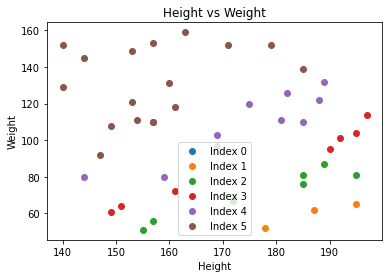

In [21]:
import matplotlib.pyplot as plt

# Plot the data points from the cleaned dataset
for index in range(6):
    subset = cleaned_dataset[cleaned_dataset[:, 3] == index]
    plt.scatter(subset[:, 1], subset[:, 2], label=f'Index {index}')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.title('Height vs Weight')
plt.show()

---

## Exercise 2

Given a dataset of objects with 2 features, create new datasets where both features are normalised.

In [22]:
dataset2 = np.array([[116.87714213,  22.38724318],[ 98.05089468,  17.70419866],[121.91732905,  20.76950035],[150.60375643,  20.44777321],[116.15969721,  20.22792041],[175.55264595,  21.02920868],[130.2102414 ,  22.23461658],[117.79758934,  21.54449521],[199.05450964,  20.53902401],[155.00458477,  20.67588878],[160.27851623,  20.30877322],[142.49587465,  18.75387901],[167.32252309,  21.2040159 ],[178.11489609,  19.52285308],[135.76602655,  18.01816954],[117.62628615,  20.95436217],[171.74626081,  20.37269529],[130.11860385,  19.56387712],[122.68044125,  21.48927022],[159.43238282,  21.38030275],[108.78123817,  19.86203164],[152.70729255,  21.24708246],[143.64358057,  21.40357256],[209.68785285,  19.65378059],[133.08486628,  19.23372601],[138.2204662 ,  20.37983756],[143.65610499,  19.92235183],[143.29146765,  20.56157279],[106.79099845,  19.35181412],[208.89304694,  19.9697894 ],[183.55451445,  20.36281171],[144.46962995,  19.83011097],[174.87583233,  20.25079178],[137.33207546,  21.02909898],[187.74834101,  20.23883521],[127.59840561,  21.7328862 ],[110.15966458,  19.29460209],[130.82208863,  18.98107528],[166.72373008,  20.63258552],[154.50866392,  21.05583445],[190.93412702,  21.08776453],[148.62481651,  19.40248102],[115.50503568,  18.39916603],[155.39233722,  20.23610734],[146.44242825,  20.30917973],[114.21209804,  19.10945672],[140.4159023 ,  19.96369514],[140.82108456,  20.05603083],[129.50278428,  18.92210224],[174.88635445,  19.03980704]])

1. Normalise features with $[0,1]$-scaling

In [23]:
# Normalise features with [0,1]-scaling
min_vals = dataset2.min(axis=0)
max_vals = dataset2.max(axis=0)
dataset2_normalized_01 = (dataset2 - min_vals) / (max_vals - min_vals)

# Output the normalized dataset
print("[0,1]-scaled dataset:")
print(dataset2_normalized_01)

[0,1]-scaled dataset:
[[0.16863813 1.        ]
 [0.         0.        ]
 [0.21378614 0.65455318]
 [0.47074788 0.58585276]
 [0.16221154 0.5389062 ]
 [0.69423023 0.71001034]
 [0.28807079 0.96740868]
 [0.17688313 0.82004272]
 [0.90475069 0.60533812]
 [0.51016877 0.63456371]
 [0.55741058 0.55617121]
 [0.39812066 0.22414486]
 [0.62050802 0.74733802]
 [0.71718186 0.38834874]
 [0.33783733 0.06704418]
 [0.17534866 0.69402789]
 [0.66013413 0.5698209 ]
 [0.28724994 0.39710886]
 [0.2206218  0.80825018]
 [0.54983125 0.78498167]
 [0.0961182  0.46077567]
 [0.48959053 0.7565343 ]
 [0.40840136 0.78995062]
 [1.         0.41630651]
 [0.31382055 0.32660961]
 [0.35982324 0.57134603]
 [0.40851355 0.47365622]
 [0.40524727 0.6101531 ]
 [0.07829041 0.35182571]
 [0.99288044 0.48378586]
 [0.76590782 0.56771039]
 [0.41580079 0.45395945]
 [0.6881676  0.54379007]
 [0.35186538 0.70998691]
 [0.80347447 0.54123691]
 [0.26467499 0.86027103]
 [0.1084656  0.33960886]
 [0.29355148 0.27265951]
 [0.61514427 0.6253169 ]
 [0

2. Normalise features with Gaussian normalisation

In [24]:
# Normalise features with Gaussian normalisation
mean_vals = dataset2.mean(axis=0)
std_vals = dataset2.std(axis=0)
dataset2_normalized_gaussian = (dataset2 - mean_vals) / std_vals

# Output the Gaussian normalized dataset
print("Gaussian normalized dataset:")
print(dataset2_normalized_gaussian)

Gaussian normalized dataset:
[[-1.09940793  2.15253936]
 [-1.79571966 -2.48367468]
 [-0.91299047  0.55097397]
 [ 0.14801204  0.2324641 ]
 [-1.12594351  0.01480983]
 [ 1.07077715  0.80808521]
 [-0.60626699  2.00143903]
 [-1.06536407  1.31821887]
 [ 1.94002225  0.32280239]
 [ 0.31078204  0.45829852]
 [ 0.50584483  0.09485411]
 [-0.15186786 -1.44449114]
 [ 0.76637602  0.98114436]
 [ 1.1655451  -0.68320682]
 [-0.4007795  -2.17284351]
 [-1.07169993  0.73398717]
 [ 0.92999336  0.15813696]
 [-0.60965632 -0.64259302]
 [-0.88476584  1.26354613]
 [ 0.47454956  1.15566834]
 [-1.39884482 -0.34742005]
 [ 0.22581389  1.02378025]
 [-0.10941856  1.17870545]
 [ 2.33330942 -0.55358858]
 [-0.49994548 -0.96944262]
 [-0.30999906  0.16520781]
 [-0.10895532 -0.28770306]
 [-0.12244188  0.34512569]
 [-1.47245626 -0.85253539]
 [ 2.30391256 -0.24073987]
 [ 1.36673602  0.14835222]
 [-0.07886611 -0.37902151]
 [ 1.04574438  0.03745249]
 [-0.34285727  0.80797661]
 [ 1.52184981  0.02561548]
 [-0.70286893  1.50472595]

3. In three different plots show the original data, $[0,1]$-normilised, and Gaussian normalised data.

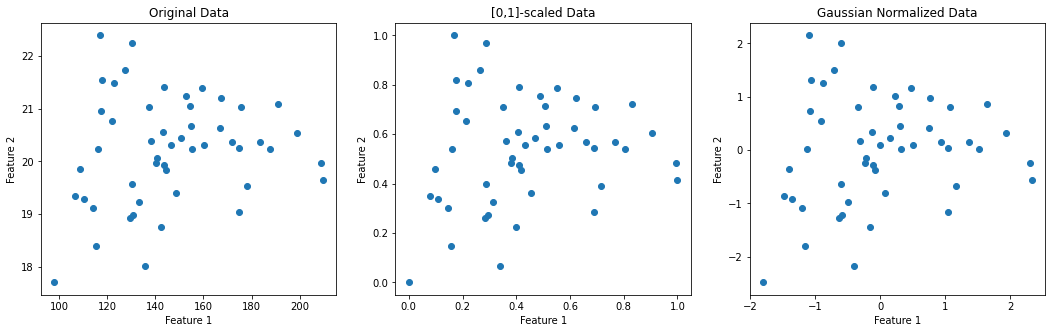

In [25]:
# Plot the original, [0,1]-scaled, and Gaussian normalized data
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Original data
axs[0].scatter(dataset2[:, 0], dataset2[:, 1])
axs[0].set_title('Original Data')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# [0,1]-scaled data
axs[1].scatter(dataset2_normalized_01[:, 0], dataset2_normalized_01[:, 1])
axs[1].set_title('[0,1]-scaled Data')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

# Gaussian normalized data
axs[2].scatter(dataset2_normalized_gaussian[:, 0], dataset2_normalized_gaussian[:, 1])
axs[2].set_title('Gaussian Normalized Data')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.show()

---

## Exercise 3

Given training ($\texttt{y_true}$) and predicted ($\texttt{y_pred}$) data for binary classification, where 1 corresponds to the positive class and 0 corresponds to the negative class, compute
1. The number of True Positives, True Negatives, False Positives, False Negatives
2. Accuracy
3. Precision
4. Recall
5. F-score

In [26]:
y_true = np.array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [27]:
# Compute the number of True Positives, True Negatives, False Positives, False Negatives
TP = np.sum((y_true == 1) & (y_pred == 1))
TN = np.sum((y_true == 0) & (y_pred == 0))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

# Output the results
print(f'True Positives: {TP}')
print(f'True Negatives: {TN}')
print(f'False Positives: {FP}')
print(f'False Negatives: {FN}')

# Compute Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f'Accuracy: {accuracy:.2f}')

# Compute Precision
precision = TP / (TP + FP)
print(f'Precision: {precision:.2f}')

# Compute Recall
recall = TP / (TP + FN)
print(f'Recall: {recall:.2f}')

# Compute F-score
f_score = 2 * (precision * recall) / (precision + recall)
print(f'F-score: {f_score:.2f}')

True Positives: 22
True Negatives: 15
False Positives: 5
False Negatives: 8
Accuracy: 0.74
Precision: 0.81
Recall: 0.73
F-score: 0.77


---

## Exercise 4

Given training and predicted data for 4-class classification, where classes are 0,1,2,3

In [28]:
y_true = np.array([1, 2, 3, 0, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 2, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 3, 2, 1, 1, 2, 1, 0, 3, 1, 2, 0, 0, 1,3, 2, 3, 3, 3, 0, 3, 1, 0, 1, 0, 2, 0, 3, 3, 3, 2, 0, 1, 3, 0, 1,3, 3, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 1, 2, 3, 2, 2, 3, 2, 2, 1, 1,2, 2, 0, 3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 3, 1, 0, 2, 0, 3, 3, 2,1, 0, 3, 2, 0, 1, 3, 1, 2, 1, 3, 2, 2, 2, 2, 3, 3, 3, 2, 0, 2, 2,2, 0, 2, 0, 0, 3, 0, 2, 2, 0, 1, 1, 2, 2, 3, 0, 1, 0, 1, 0, 0, 0,0, 0, 2, 2, 0, 3, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 2, 2, 3, 3, 1, 3,1, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 3, 0, 2, 1, 1, 1, 1, 3, 2, 1, 3,1, 0])
y_pred = np.array([1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 3, 1, 2, 1, 3, 2, 3, 1, 1, 2, 3, 0, 0, 1, 0, 1, 0, 2, 3, 2, 0, 1, 3, 1, 0, 0, 1, 3, 1, 0, 1,3, 3, 3, 3, 3, 1, 3, 1, 2, 2, 0, 2, 0, 3, 3, 3, 0, 2, 2, 3, 2, 2,3, 3, 2, 2, 1, 3, 3, 2, 3, 2, 3, 2, 2, 0, 3, 1, 2, 3, 3, 1, 2, 2,2, 2, 0, 3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 3, 2, 0, 2, 0, 3, 3, 2,1, 0, 3, 2, 0, 1, 3, 1, 2, 1, 0, 3, 2, 2, 0, 3, 3, 3, 2, 1, 2, 3,2, 0, 2, 0, 0, 3, 0, 2, 3, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0,0, 0, 2, 2, 0, 0, 3, 2, 3, 0, 0, 3, 3, 0, 1, 1, 2, 2, 3, 3, 2, 3,1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 3, 0, 2, 1, 1, 1, 1, 3, 3, 1, 3,1, 0])

1. Compute the confusion matrix, i.e. a 4x4 matrix $\overline{A}$, in which an element $\overline{A}_{i,j}$ contains the number of elements that were predicted to be in class $i$, while their true class is $j$

In [29]:
# Compute the confusion matrix
confusion_matrix = np.zeros((4, 4), dtype=int)
for true, pred in zip(y_true, y_pred):
    confusion_matrix[true, pred] += 1

# Output the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix)

Confusion Matrix:
[[40 10  4  2]
 [ 1 30 12  0]
 [ 3  3 36 11]
 [ 6  2  1 39]]


2. Compute Precision, Recall, F-score for every class, and compute the macro F-score

In [30]:
# Compute Precision, Recall, F-score for every class, and compute the macro F-score
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f_score = 2 * (precision * recall) / (precision + recall)
macro_f_score = np.mean(f_score)

# Output the results
for i in range(4):
    print(f'Class {i} - Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F-score: {f_score[i]:.2f}')
print(f'Macro F-score: {macro_f_score:.2f}')

Class 0 - Precision: 0.80, Recall: 0.71, F-score: 0.75
Class 1 - Precision: 0.67, Recall: 0.70, F-score: 0.68
Class 2 - Precision: 0.68, Recall: 0.68, F-score: 0.68
Class 3 - Precision: 0.75, Recall: 0.81, F-score: 0.78
Macro F-score: 0.72
